In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv("/kaggle/input/logistic-regression/Social_Network_Ads.csv")
df

In [3]:
df.drop(['User ID'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [5]:
df.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [6]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [8]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [9]:
df.Age.unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54])

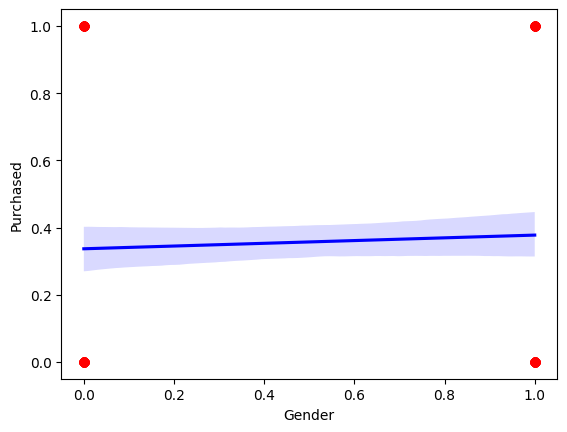

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="Gender",y="Purchased",data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.xlabel("Gender")
plt.ylabel("Purchased")
plt.show()

In [11]:
df.EstimatedSalary.unique()

array([ 19000,  20000,  43000,  57000,  76000,  58000,  84000, 150000,
        33000,  65000,  80000,  52000,  86000,  18000,  82000,  25000,
        26000,  28000,  29000,  22000,  49000,  41000,  23000,  30000,
        74000, 137000,  16000,  44000,  90000,  27000,  72000,  31000,
        17000,  51000, 108000,  15000,  79000,  54000, 135000,  89000,
        32000,  83000,  55000,  48000, 117000,  87000,  66000, 120000,
        63000,  68000, 113000, 112000,  42000,  88000,  62000, 118000,
        85000,  81000,  50000, 116000, 123000,  73000,  37000,  59000,
       149000,  21000,  35000,  71000,  61000,  75000,  53000, 107000,
        96000,  45000,  47000, 100000,  38000,  69000, 148000, 115000,
        34000,  60000,  70000,  36000,  39000, 134000, 101000, 130000,
       114000, 142000,  78000, 143000,  91000, 144000, 102000, 126000,
       133000, 147000, 104000, 146000, 122000,  97000,  95000, 131000,
        77000, 125000, 106000, 141000,  93000, 138000, 119000, 105000,
      

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['Gender','Age','EstimatedSalary']]
y = df['Purchased']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
model = LogisticRegression(solver='liblinear',max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [15]:
model.score(X_test,y_test)

0.6625

In [16]:
model.score(X_train,y_train)

0.64375

In [17]:
from sklearn.preprocessing import StandardScaler

m = StandardScaler()
scaller = m.fit_transform(X)
dff = pd.DataFrame(scaller)
dff

,0,1,2
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751
...,...,...,...
395,0.980196,0.797057,-0.844019
396,-1.020204,1.274623,-1.372587
397,0.980196,1.179110,-1.460681
398,-1.020204,-0.158074,-1.078938


In [18]:
solver = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(dff,y,test_size=0.2,random_state=42)
solver.fit(X_train,y_train)

LogisticRegression()

In [19]:
solver.score(X_test,y_test)

0.8875

In [20]:
solver.score(X_train,y_train)

0.815625